<a href="https://colab.research.google.com/github/GuilhermeOrtega/GuilhermeOrtega/blob/main/AulaEstatistica20_03_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula distribuição Discretas

Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from scipy.stats import binom, poisson

Dados

In [8]:
dados_acidentes = pd.read_csv('acidentes.csv')
dados_acidentes

,id_acidente,data_acidente,tipo_lesao,risco_classificacao
0,1,2014-02-11,Laceração,Leve
1,2,2014-02-05,Ferimentos Perfurantes,Médio
2,3,2014-01-31,Contusão,Leve
3,4,2014-01-13,Corte,Leve
4,5,2014-02-14,Contusão,Médio
...,...,...,...,...
436,489,2018-04-14,Corte,Médio
437,490,2018-04-24,Corte,Médio
438,491,2018-05-04,Torção,Leve
439,492,2018-05-10,Queimadura,Leve


##Distribuição

* Uniforme

In [12]:
n = 6
1 / n



0.16666666666666666

In [13]:
n = 25
1 / n

0.04

* Bernoulli

In [16]:
p = 0.8
p, (1 - p)

(0.8, 0.19999999999999996)

* Binomial

Binom - PMF(PROBABILITY MASS FUNCTION) P(X=7

CDF (CUMULATIVE DISRIBUTION FUNCTIN) P(15 < X < 17)

PPF - (PASSA A PROBABILIDADE E FUNÇÃO PASSA O VALOR)

In [27]:
# pmf P(x = 7) Probabilidade no ponto
k = 5 #Acidentes
p = 0.2 # Proabilidade de acidente
n = 20 #Funcionarios
binom.pmf(n = n, k = k, p = p)

np.float64(0.17455952155688056)

In [28]:
# cdf P(x <= 7) Probabiidade acumulada - Saber a probabilidade maior que 7
k = 7 #Acidentes
p = 0.2 # Proabilidade de acidente
n = 20 #Funcionarios
binom.cdf(n = n, k = k, p = p)

np.float64(0.9678573369191248)

In [33]:
# cdf P(x > 7) Saber a probabilidade maior que 7
k = 7 #Acidentes
p = 0.2 # Proabilidade de acidente
n = 20 #Funcionarios
1 - binom.cdf(n = n, k = k, p = p)

np.float64(0.03214266308087521)

In [32]:
# ppf - Probabilidade de sucesso
q = 0.2 #Chance de retorno para emtrevista
n = 20 #Empresas
p = 0.2 #Sucesso
binom.ppf(n = n, p = p, q = 1-q)
#Resultado igual a 5 empresas que dariam retorno

np.float64(5.0)

* Poisson

In [35]:
#pmf P(K=7)
k = 7 #7 acidentes
media = 20 # media mensal de acidetes
poisson.pmf(mu = media, k = k)

np.float64(0.0005234675866510618)

In [39]:
#cdf P(K <= 7)
k = 7 #7 acidentes
media = 20 # media mensal de acidetes
poisson.cdf(mu = media, k=k)

np.float64(0.000778590082507362)

In [42]:
# P(15 <= K <= 17)
media = 20
valores = list(range(15,18))
sum(poisson.pmf(mu = media, k = valores))

np.float64(0.19216411681668827)

##Análise de Acidentes

In [43]:
dados_acidentes

,id_acidente,data_acidente,tipo_lesao,risco_classificacao
0,1,2014-02-11,Laceração,Leve
1,2,2014-02-05,Ferimentos Perfurantes,Médio
2,3,2014-01-31,Contusão,Leve
3,4,2014-01-13,Corte,Leve
4,5,2014-02-14,Contusão,Médio
...,...,...,...,...
436,489,2018-04-14,Corte,Médio
437,490,2018-04-24,Corte,Médio
438,491,2018-05-04,Torção,Leve
439,492,2018-05-10,Queimadura,Leve


- Obter o numero de acidente por mês

In [44]:
#Ajustar a data,a data está como texto
dados_acidentes.dtypes

,0
id_acidente,int64
data_acidente,object
tipo_lesao,object
risco_classificacao,object


In [46]:
dados_acidentes['data_acidente'] = pd.to_datetime(dados_acidentes['data_acidente'])
dados_acidentes.dtypes

,0
id_acidente,int64
data_acidente,datetime64[ns]
tipo_lesao,object
risco_classificacao,object


In [47]:
# extrair o mês e ano
dados_acidentes['data_acidente'].dt.strftime('%Y-%m')

,data_acidente
0,2014-02
1,2014-02
2,2014-01
3,2014-01
4,2014-02
...,...
436,2018-04
437,2018-04
438,2018-05
439,2018-05


In [49]:
#Tranformar em uma coluna ano e mês
dados_acidentes['anomes_acidente'] = dados_acidentes['data_acidente'].dt.strftime('%Y-%m')

In [50]:
dados_acidentes

,id_acidente,data_acidente,tipo_lesao,risco_classificacao,anomes_acidente
0,1,2014-02-11,Laceração,Leve,2014-02
1,2,2014-02-05,Ferimentos Perfurantes,Médio,2014-02
2,3,2014-01-31,Contusão,Leve,2014-01
3,4,2014-01-13,Corte,Leve,2014-01
4,5,2014-02-14,Contusão,Médio,2014-02
...,...,...,...,...,...
436,489,2018-04-14,Corte,Médio,2018-04
437,490,2018-04-24,Corte,Médio,2018-04
438,491,2018-05-04,Torção,Leve,2018-05
439,492,2018-05-10,Queimadura,Leve,2018-05


In [55]:
historico_acidentes = dados_acidentes.groupby('anomes_acidente')['id_acidente'].count().reset_index()

In [57]:
historico_acidentes.head(10)

,anomes_acidente,id_acidente
0,2013-07,1
1,2014-01,15
2,2014-02,12
3,2014-03,11
4,2014-04,10
5,2014-05,8
6,2014-06,6
7,2014-07,6
8,2014-08,12
9,2014-09,7


<Axes: >

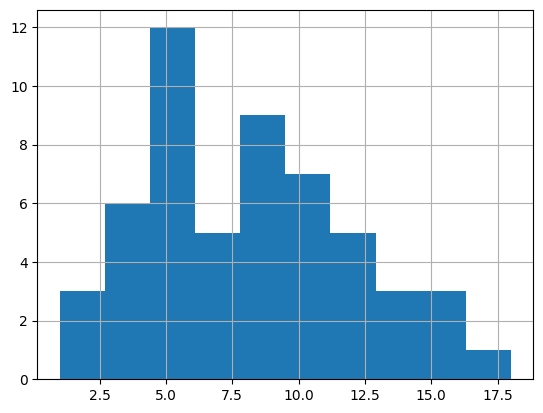

In [58]:
#Histograma
historico_acidentes['id_acidente'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7b08fe37b550>,
 'caps': [<matplotlib.lines.Line2D at 0x7b08fe2c4a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b08fe37ad50>],
 'medians': [<matplotlib.lines.Line2D at 0x7b08fe2c5bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b08fe2c63d0>],
 'means': []}

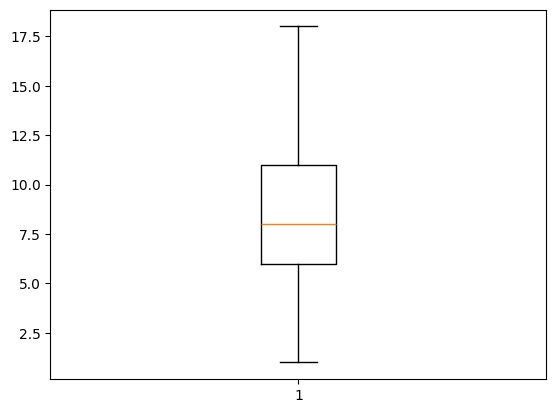

In [60]:
plt.boxplot(historico_acidentes['id_acidente'])

- Obter as probabilidades

In [65]:
#Indentificamos que a distribuião é de Poisson
media_mensal = historico_acidentes['id_acidente'].mean()
media_mensal

np.float64(8.166666666666666)

In [70]:
# Probabilidade de 7 acidentes
poisson.pmf(mu = media_mensal, k = 7)

np.float64(0.13650388195181393)

In [74]:
# Probabilidade de 4 a 6 acidentes
acidentes = list(range(4,7))
sum(poisson.pmf(k = acidentes, mu = media_mensal))

np.float64(0.2555945240092576)